In [1]:
from utils import *

# LLM  WORKSHOP PART 3 
## 3 Fast 3 LLM

<br>
<span style="font-size:20px;">
    

This workshop is going to be different given its the final one. We will do a live code along instead of a large hands on part. You give me ideas, I write the code, we shall discuss the merits of the ideas on the spot.
    
Thankfully there are not THAT many techincal things one ought to know about using Language Models. 

 You can go very far with: 
* Good prompt engineering.
* Good software engineering.
* Good product engineering.

In simple words, the starting limitation is your creativity. Eventually you will run into techincal bandwidth limits, but things are [moving so fast](https://openai.com/blog/new-models-and-developer-products-announced-at-devday) that, that isn't our biggest worry right now.
   
</span>

## Lets also not forget that LLMs opened up a gold mine.

<br>
<span style="font-size:20px;">
    
* Whereas Netflix had to wait around 3.5 years to reach 1 million users. Incredibly, it's estimated that ChatGPT hit 100 million monthly active users in January 2023. This made it the fastest-growing application in history until Threads took that crown in July 2023. [Read more](https://explodingtopics.com/blog/chatgpt-users)
    * Language models already existed well before ChatGPT got famous. I was using `gpt-3` in 2020! 
    * All that was missing was someone, somewhere, thinking "wait I can use this thing that already exists, to make something crazy".
    * AI startup founding is [growing exponentially](https://news.crunchbase.com/ai-robotics/us-startup-funding-doubled-openai-anthropic-2023/). The money is out there, you just have to claim it.

    <br>
    
* LLMs will change the world as we know it. They are a technological revolution on the scale of Electricity, the Internet or Social Media. If you think those things didn't change The World, you are not thinking.
    * The labor market shifts will be [immense](https://openai.com/research/gpts-are-gpts). 
    * Our productivity is going to [skyrocket](https://txt.cohere.com/unlocking-productivity-with-generative-ai/).
</span>




# Embeddings 

<br>
<span style="font-size:20px;">
    

Embeddings are crazy.

</span>

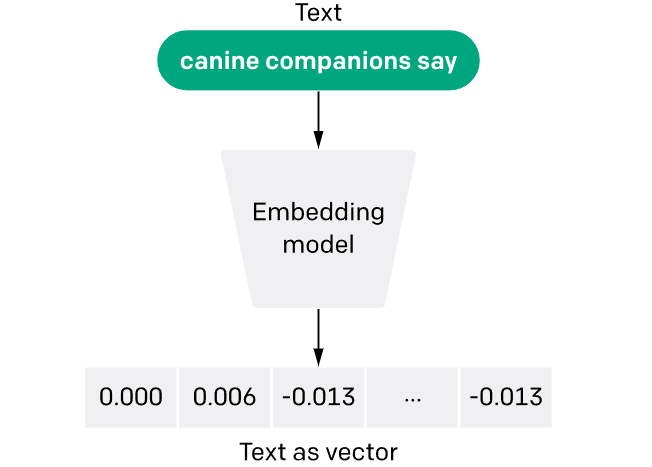



## What are embeddings. 

<br>
<span style="font-size:20px;">
    

Embeddings are vectors. Just a list of numbers.
    
They are representations of semantic data as vectors.
    
This means that the actual meaning of a sentence is contained within its embedding.
    
And this also means that we can apply vector operations on them. And treat semantics as math.
    
The profound insight of embeddings is that semantics exists along some n-dimensional space. LLMs already prove that logic, reason and thought can be approximated with a sufficiently complex universal function generator (Neural Network). 
    
</span>

### Lets see what embeddings are 

In [2]:
sentence = "This might look like words but it can be represented as"

In [3]:
# 0's and 1's 
# Electrons on a transistor 
' '.join(format(ord(char), '08b') for char in sentence)

'01010100 01101000 01101001 01110011 00100000 01101101 01101001 01100111 01101000 01110100 00100000 01101100 01101111 01101111 01101011 00100000 01101100 01101001 01101011 01100101 00100000 01110111 01101111 01110010 01100100 01110011 00100000 01100010 01110101 01110100 00100000 01101001 01110100 00100000 01100011 01100001 01101110 00100000 01100010 01100101 00100000 01110010 01100101 01110000 01110010 01100101 01110011 01100101 01101110 01110100 01100101 01100100 00100000 01100001 01110011'

In [4]:
# A vector 
# truncated for aesthetics
# Spans a much larger space
get_embedding(sentence)[0:10]

[-0.008101804,
 -0.00046369174,
 0.0057512405,
 -0.008433419,
 -0.017517062,
 0.033837713,
 -0.0042492207,
 -0.03547628,
 0.0071784845,
 -0.035034124]

In [32]:
# Lets recall that we can measure the "orthogonality of a vector"
x_hat = [1,0]
y_hat = [0,1]

cs = cosine_similarity
cs(x_hat,y_hat), cs(x_hat,x_hat), cs(x_hat,[c + 0.1 for c in y_hat])

(0.0, 1.0, 0.09053574604251853)

In [25]:
city = "Paris" # We shall play around with values of this 
city_embedding = get_embedding(city)

countries = "United States of America","Australia","France","Colombia","Taiwan"
for country in countries:
    country_embedding = get_embedding(country)
    similarity = cosine_similarity(city_embedding,country_embedding)
    
    print(f"Country = {country}, Cosine similarity to city = {similarity:.3f}")

Real Country = United States of America, Cosine similarity to City = 0.777
Real Country = Australia, Cosine similarity to City = 0.839
Real Country = France, Cosine similarity to City = 0.897
Real Country = Colombia, Cosine similarity to City = 0.779
Real Country = Taiwan, Cosine similarity to City = 0.784


## Discussion time

<br>
<span style="font-size:20px;">
    
What do you think we can use this use this for?
    
    
What are a few things we can make with embeddings? 
    
    
What can we make now that we couldn't before?
    
    
What can YOU make now that YOU couldn't before?


</span>

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>











<span style="font-size:20px;">
    
Oh I forgot to mention. [Text embeddings work on other kinds of data as well](https://sidsite.com/posts/video-search-demo/).


</span>

### Lets make a naive search engine

In [36]:
# Lets for a second imagine this is a database
# In some kind of ecommerce company, lol 
database = [
    "Coke Zero Caffeine Free Soda 12 oz Cans Bundled by Louisiana Pantry (24 Pack)",
    "PlayStation 5 Console -  Marvel’s Spider-Man 2 Bundle (slim)",
    "EVGA GeForce RTX 2080 Ti Black Edition Gaming, 11GB GDDR6)",
    "adidas Mens Yeezy Boost 350 V2 GY3438",
    "SEPHORA COLLECTION Matte Perfection Powder Foundation 24 Warm Beige",
    "Barbie 3-Story Townhouse Dollhouse with Elevator, Swing Chair, Furniture and Accessories"
]

# Let's just embed the product titles
# Let's ignore the fact that doing it this way
# Is extremely inefficient
product_embeddings = [get_embedding(product) for product in database]

In [81]:
# Lets make a search query here 
search_query = "children"

# Lets embed our query as well, you probably see where
# we are going with this 
query_embedding = get_embedding(search_query)

# Lets find the cosine similarities of our query and the 
# product title embeddings 
query_title_similarities = [cosine_similarity(query_embedding,product_embedding) for product_embedding in product_embeddings]

In [82]:
database[np.argmax(query_title_similarities)]

'Barbie 3-Story Townhouse Dollhouse with Elevator, Swing Chair, Furniture and Accessories'

## Quick Question

<br>
<span style="font-size:20px;">
    
Did you guys realize that the trick I showed you above is actually two things in one? In that there is a secret algorithm inside of the one I showed you? It's in plain sight. 
    
Hint: [Google](https://en.wikipedia.org/wiki/PageRank).


</span>

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

## Retrieval Augmented Generation

<br>
<span style="font-size:20px;">
    
Retrieval Augmented Generation (RAG) is a technique used to inject knowledge into already trained LLM chat conversations. 
    
The reason we do this is because we might want the LLM to talk about things it might necessarily not know about.
    
So when the user asks a question that crosses a a certain threshold of similarity. The content of that document is just inserted into the prompt. 
    
This allows the LLM to reference the document and answer questions about it.
    
You might ask, why do this at all? Can't we just direct the user to the document itself? Well.. we wouldn't need chatbots if people had to the patient to read, lol.



</span>

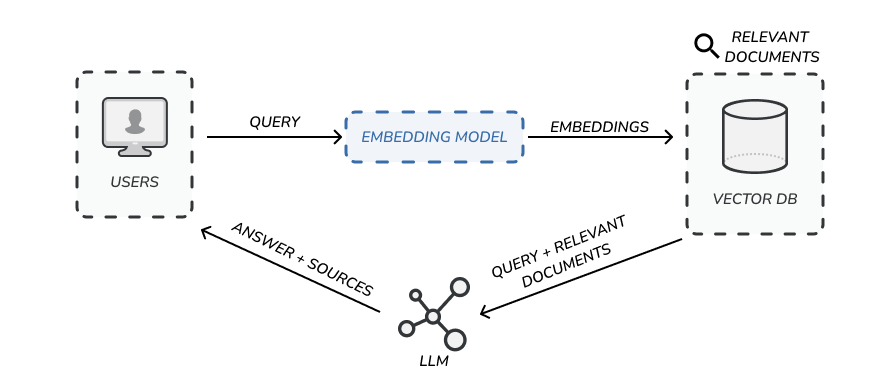

<span style="font-size:20px;">
    
RAG is actually one of the most common technique various "AI" startups are using. However [OpenAI incorporated it](https://www.youtube.com/watch?v=U9mJuUkhUzk) into the new "Agent" functionality so I don't really know how much of a moat that exists anymore. 


</span>



In [62]:
os.listdir('knowledge_base')

['Caliphornia.txt', 'Kangarooland.txt', 'Moronistan.txt']

In [65]:
print(read_file('knowledge_base/Moronistan.txt'))

Nestled snugly within the obtuse angle of geography and intellect lies the remarkably underwhelming country of Moronistan. As if carved out by the less sharp knife in Mother Nature’s drawer, Moronistan is populated with a breed of citizen that makes the Scarecrow from Oz look like Einstein post-brainstorming session.

The national flag, a perplexing combination of clashing colors, features the silhouette of a head with a void where the brain should be. Its design speaks volumes about the cognitive prowess—or rather the lack thereof—that pervades the land.

Moronistanis, bless their hearts, bumble through life like a troupe of circus clowns minus the intentional humor. Their economy is an accidental tribute to the barter system, for currency was abandoned after the perplexing incident where the entire population collectively forgot what money was actually for and started using bills as kindling for their campfires.

Education in Moronistan is as challenging as teaching quantum physics t

In [ ]:
def chat_with_gpt_rag() -> None:
    """lol"""
    messages = [{"role": "system","content": "If you don't know about it. Please say you don't. Don't make things up. Moreover you might be given knowledge about things, answer from that verbatim."},{"role": "assistant","content": "Hello!"}]
    
    knowledge_content = 
    knowledge_embeddings 

    intercepted = False
    while True: 
        user_input = input("User: ")
        if user_input == "STOP":
            break
            
        user_input_embedding = get_embedding(contents[0])

        messages.append({'role':'user','content':user_input})
        result = get_openai_chat(messages)
        print(f"Bot: {result}")
        messages.append({'role':'assistant','content':result})

In [67]:
contents = [read_file(f'knowledge_base/{file}') for file in os.listdir('knowledge_base')]

In [69]:
a = get_embedding(contents[0])

In [78]:
question = 'Can you tell me about moronistan?'
qe = get_embedding(question)

cs(qe,a)

0.7800214766265425